# Lesson 7.03 Hierarchical Clustering

## Recap: K-Means
Here’s a brief overview of how K-means works:

1. Decide the number of clusters (k)
2. Select k random points from the data as centroids
3. Assign all the points to the nearest cluster centroid
4. Calculate the centroid of newly formed clusters
5. Repeat steps 3 and 4

It is an iterative process. It will keep on running until the centroids of newly formed clusters do not change or the maximum number of iterations are reached.

## Why Hierarchical Clustering?

Based on the above, there are certain challenges with K-means. It always tries to make clusters of the same size. Also, we have to decide the number of clusters at the beginning of the algorithm. Ideally, we would not know how many clusters should we have, in the beginning of the algorithm and hence it a challenge with K-means.

This is a gap hierarchical clustering bridges effectively. It takes away the problem of having to pre-define the number of clusters.

## What is Hierarchical Clustering?
- We assign each point to an individual cluster in this technique. Suppose there are 4 data points. We will assign each of these points to a cluster and hence will have 4 clusters in the beginning:

- Then, at each iteration, we merge the closest pair of clusters and repeat this step until only a single cluster is left:

- We are merging (or adding) the clusters at each step, right? Hence, this type of clustering is also known as additive hierarchical clustering.


## Setting up for hierarchical clustering analysis

### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
import sklearn.metrics as sm

In [2]:
from sklearn.cluster import AgglomerativeClustering

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [3]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10, 3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

### Load Data

In [4]:
address = 'data/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

# set the following columns as X
X = cars[['mpg', 'disp', 'hp', 'wt']].values

# set col-index=9 (i.e. am) as y
# am refers to whether the car has automatic or manual transmission
y = cars.iloc[:,(9)].values

### Using `scipy` to generate dendrograms

In [5]:
# call linkage function on X-values
# linkage function executes hierarchical clustering on specified data
# ward takes the sum of squares of dist btw each pair of points divided by total sum of similarities btw 2 clusters
# Z is the clustering result that has been generated from scipy's hierarchical clustering library

# Here, "X" represents the matrix of data that we are clustering, and "ward" tells our
# algorithm which method to use to calculate distance between our newly formed
# clusters - in this case Ward's Method which seeks to minimize the variance when
# forming clusters. When calculating distance, the default is Euclidean distance
Z = linkage(X, 'ward')

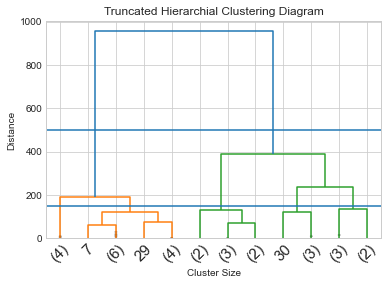

In [6]:
# create dendogram using clustering results, Z from above
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15, show_contracted=True)

plt.title('Truncated Hierarchial Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

# create horizontal lines on the plot
plt.axhline(y=500)
plt.axhline(y=150)

# display dendogram
plt.show()

### Generating hierarchical clusters

In [7]:
# Set k = 2, since Y variable consists of only 2 classes either automatic or manual transmission
k=2

# create hierarchical clustering object
Hclustering = AgglomerativeClustering(n_clusters=k)
Hclustering.fit(X)

# The labels_ property returns an array of integers where the values correspond to the distinct categories
labels = Hclustering.labels_
labels

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

### Visualise Clusters

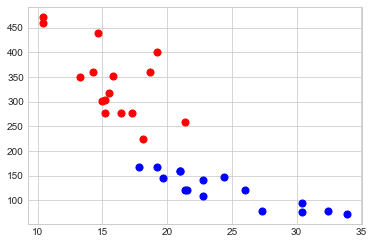

In [8]:
# We can use a shorthand notation to display all the samples belonging to a category as a specific color.

# plt.scatter(x,y,s,marker,color) where
# x represents the X-values of each point on the plot
# y represents the Y-values of each point on the plot
# s represents the size of each point on the plot
# marker represents the formatting style of each point on the plot


plt.scatter(
            # for Cluster labelled as 0, use col-index=0 in X-data as X-value of plot points
            X[labels==0, 0], 
            
            # for Cluster labelled as 0, use col-index=1 in X-data as Y-value of plot points          
            X[labels==0, 1], 
            
            # marker size = 50
            s=50, 
            
            # marker type = o
            marker='o', 
            
            # marker color = red
            color='red')


plt.scatter(
            # for Cluster labelled as 1, use col-index=0 in X-data as X-value of plot points    
            X[labels==1, 0], 
    
            # for Cluster labelled as 1, use col-index=1 in X-data as Y-value of plot points
            X[labels==1, 1], 
    
            # marker size = 50
            s=50, 
            
            # marker type = o    
            marker='o', 
            
            # marker color = blue   
            color='blue')

### Check Model Performance

In [9]:
# generate accuracy score
sm.accuracy_score(y, labels)

0.78125